In [4]:
import pandas as pd
import requests
from selenium.common.exceptions import TimeoutException
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import datetime
from trading_bot import *

pd.options.display.max_columns = 100

def get_crossovers(reduced_df, col="position_15"): 
    values = []
    signal_columns = [0]  
    for i in range(reduced_df.shape[0]-1):
        if i == reduced_df.shape[0]:
            break
        i_1 = reduced_df.index[i]
        i_2 =reduced_df.index[i+1]
        val_1 = reduced_df[col].loc[i_1].round(2)
        val_2 = reduced_df[col].loc[i_2].round(2)
        #print(val_1) 
        #print(val_2)
        if np.sign(val_1) == np.sign(val_2):
            
            signal_columns.append(0)
            
        else:
            values.append(reduced_df.index[i+1])
            signal_columns.append(1)
            #print("CROSSOVER")
            #print(i_1, i_2, val_1, val_2)
            #print(" -"*10)
            
    return (values, signal_columns)


df = getData(ticker="BTC")



API Success
Auth Success
{'1. Information': 'Daily Prices and Volumes for Digital Currency', '2. Digital Currency Code': 'BTC', '3. Digital Currency Name': 'Bitcoin', '4. Market Code': 'USD', '5. Market Name': 'United States Dollar', '6. Last Refreshed': '2018-09-08 (end of day)', '7. Time Zone': 'UTC'}


In [5]:
mymask = ((df["datetime"] > datetime.datetime(year=2018,month=2,day=1)))
cols = df.columns.tolist()
reduced_df = df[[cols[0],
                cols[1],
                cols[3],
                cols[5],
                cols[7],
                 cols[-2],
                ]].loc[mymask].reset_index(drop=True).set_index("datetime").astype(float
                                                                                )
reduced_df['returns'] = np.log(reduced_df["4a. close (USD)"] / reduced_df["4a. close (USD)"].shift(1))
reduced_df.head()

#reduced_df.astype(float)["4a. close (USD)"]

,1a. open (USD),2a. high (USD),3a. low (USD),4a. close (USD),5. volume,returns
datetime,,,,,,
2018-02-02,9142.485329,9151.980874,7838.191489,8908.390555,289674.743150,NaN
2018-02-03,8890.600039,9508.674437,8245.483994,9223.370561,122968.337899,0.034747
2018-02-04,9263.886770,9393.629004,7920.466779,8265.597054,152138.675667,-0.109639
2018-02-05,8231.277599,8380.413425,6676.680211,6920.404852,312745.674704,-0.177628
2018-02-06,6947.528871,7923.519034,6008.042307,7737.879502,454602.625935,0.111653


In [58]:
#positions = [(10, 30),(11, 31),(12, 30), (8, 35)]

positions = [(10+i, 20+i) for i in np.arange(-5,15,1) ]
for position in positions:
    col = 'rolling_%s' % position[0]
    col1 = 'rolling_%s' % position[1]

    reduced_df[col] = reduced_df["4a. close (USD)"].rolling(position[0]).mean()
    reduced_df[col1] = reduced_df["4a. close (USD)"].ewm(position[1]).mean()
    reduced_df["divergence_%s"%str(position)] = reduced_df[col1] - reduced_df[col]
    reduced_df["signal_%s"%str(position)] = np.sign(reduced_df["divergence_%s"%str(position)])

#reduced_df.tail(20)

In [59]:
reduced_df.tail()

,1a. open (USD),2a. high (USD),3a. low (USD),4a. close (USD),5. volume,returns,rolling_12,rolling_30,"divergence_(12, 30)","signal_(12, 30)","strategy_(12, 30)",rolling_15,rolling_20,"divergence_(15, 20)","signal_(15, 20)","strategy_(15, 20)",rolling_3,rolling_10,"divergence_(3, 10)","signal_(3, 10)",rolling_25,"divergence_(12, 25)","signal_(12, 25)","strategy_(3, 10)","strategy_(12, 25)",rolling_0,"divergence_(0, 10)","signal_(0, 10)",rolling_1,rolling_11,"divergence_(1, 11)","signal_(1, 11)",rolling_2,"divergence_(2, 12)","signal_(2, 12)",rolling_13,"divergence_(3, 13)","signal_(3, 13)",rolling_4,rolling_14,"divergence_(4, 14)","signal_(4, 14)",rolling_5,"divergence_(5, 15)","signal_(5, 15)",rolling_6,rolling_16,"divergence_(6, 16)","signal_(6, 16)",rolling_7,...,"divergence_(16, 26)","signal_(16, 26)",rolling_27,"divergence_(17, 27)","signal_(17, 27)",rolling_28,"divergence_(18, 28)","signal_(18, 28)",rolling_29,"divergence_(19, 29)","signal_(19, 29)","strategy_(0, 10)","strategy_(1, 11)","strategy_(2, 12)","strategy_(3, 13)","strategy_(4, 14)","strategy_(5, 15)","strategy_(6, 16)","strategy_(7, 17)","strategy_(8, 18)","strategy_(9, 19)","strategy_(10, 20)","strategy_(11, 21)","strategy_(12, 22)","strategy_(13, 23)","strategy_(14, 24)","strategy_(15, 25)","strategy_(16, 26)","strategy_(17, 27)","strategy_(18, 28)","strategy_(19, 29)","divergence_(20, 30)","signal_(20, 30)",rolling_31,"divergence_(21, 31)","signal_(21, 31)",rolling_32,"divergence_(22, 32)","signal_(22, 32)",rolling_33,"divergence_(23, 33)","signal_(23, 33)",rolling_34,"divergence_(24, 34)","signal_(24, 34)","strategy_(20, 30)","strategy_(21, 31)","strategy_(22, 32)","strategy_(23, 33)","strategy_(24, 34)"
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-04,7269.066565,7394.179148,7251.268751,7364.443046,66334.659553,0.014939,7026.727890,6953.492677,-78.466479,-1.0,-0.014939,6913.004264,6790.699631,-29.216760,-1.0,0.014939,7255.240792,7087.921265,-318.999669,-1.0,6925.401003,-106.558154,-1.0,-0.014939,-0.014939,NaN,NaN,NaN,7364.443046,7057.038799,-439.048125,-1.0,NaN,NaN,NaN,6988.569224,-343.435115,-1.0,7266.219992,6944.372151,-358.294217,-1.0,7227.357706,-321.887492,-1.0,7187.127344,6875.348886,-282.947396,-1.0,7166.115697,...,54.973994,1.0,6935.622203,83.034309,1.0,6941.269308,112.800899,1.0,6947.235433,131.899727,1.0,NaN,-0.014939,NaN,-0.014939,-0.014939,-0.014939,-0.014939,-0.014939,-0.014939,-0.014939,-0.014939,-0.014939,-0.014939,-0.014939,-0.014939,0.014939,0.014939,0.014939,0.014939,0.014939,162.793046,1.0,6960.014009,193.250253,1.0,6966.773323,225.671559,1.0,6973.745499,252.919133,1.0,6980.906471,276.363098,1.0,0.014939,0.014939,0.014939,0.014939,0.014939
2018-09-05,7365.231645,7391.966795,6704.714759,6704.714759,125609.679646,-0.093852,7027.678463,6945.460840,-140.902510,-1.0,0.093852,6928.394991,6809.804659,-102.233239,-1.0,0.093852,7364.443046,7085.451519,-449.249774,-1.0,6916.911293,-169.452057,-1.0,0.093852,0.093852,NaN,NaN,NaN,6704.714759,7053.084310,202.290148,1.0,NaN,NaN,NaN,7001.957649,-467.429580,-1.0,7309.841919,6968.293905,-415.463549,-1.0,7158.944051,-266.021064,-1.0,7140.250549,6899.986170,-247.803871,-1.0,7118.211261,...,21.978445,1.0,6927.372311,62.060727,1.0,6933.108086,88.735367,1.0,6939.146069,117.191010,1.0,NaN,0.093852,NaN,0.093852,0.093852,0.093852,0.093852,0.093852,0.093852,0.093852,0.093852,0.093852,0.093852,0.093852,0.093852,0.093852,-0.093852,-0.093852,-0.093852,-0.093852,135.656181,1.0,6952.027512,165.422398,1.0,6958.821830,194.878483,1.0,6965.820282,226.300562,1.0,6973.000188,252.845139,1.0,-0.093852,-0.093852,-0.093852,-0.093852,-0.093852
2018-09-06,6715.507505,6715.507505,6365.000167,6503.564297,138757.345696,-0.030461,7007.290975,6931.194521,-190.245367,-1.0,0.030461,6937.311931,6806.035521,-163.846705,-1.0,0.030461,6704.714759,7045.560795,173.057697,1.0,6901.010131,-220.429757,-1.0,0.030461,0.030461,NaN,NaN,NaN,6503.564297,7032.552681,369.820559,1.0,N

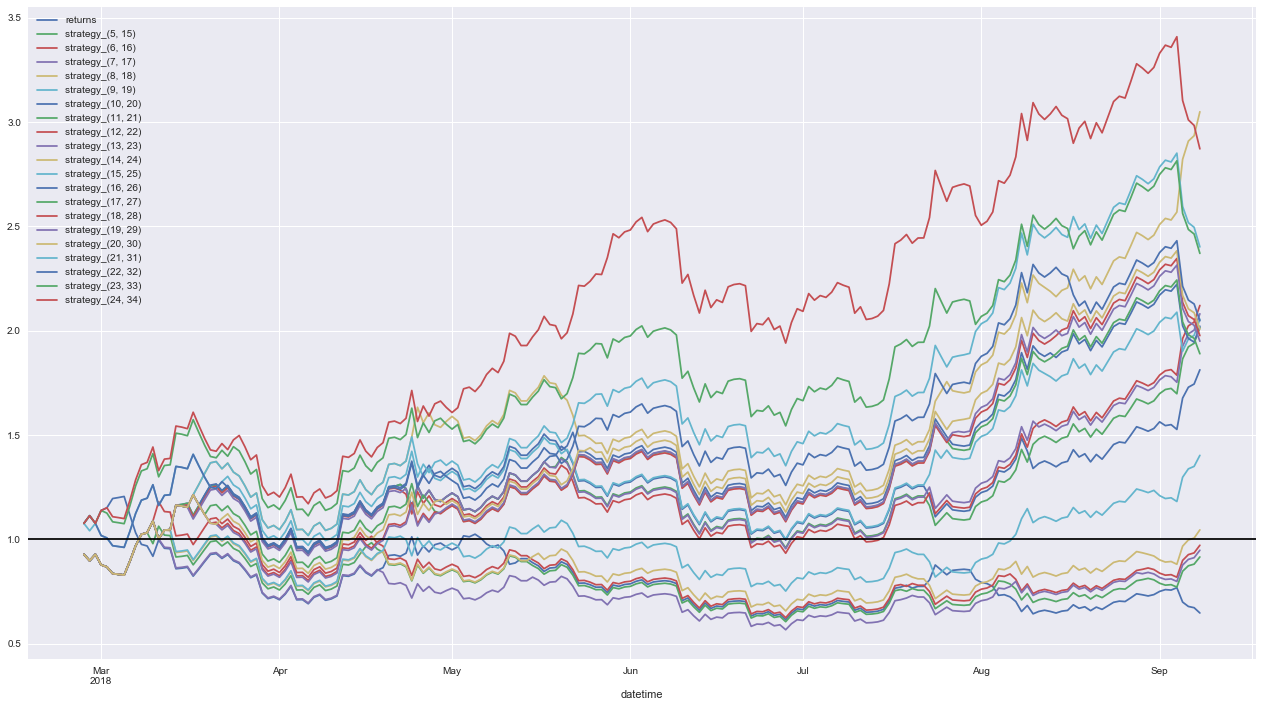

In [60]:
%matplotlib inline
import seaborn as sns; sns.set()  # 18

strats = ['returns']  # 19

for position in positions:  # 20
    strat = 'strategy_%s' % str(position)  # 21
    reduced_df[strat] = reduced_df["signal_%s"%str(position)].shift(1) * reduced_df['returns']  # 22
    strats.append(strat)  # 23

reduced_df[strats].dropna().cumsum().apply(np.exp).plot(figsize=(22,12))  # 24
plt.axhline(1, color="black")
plt.savefig("strategies_crossover_BTC.png")

In [23]:
reduced_df.to_excel("crossover_strategy_position.xlsx")

In [107]:
most_profitable_strategy = reduced_df[strats].dropna().cumsum().apply(np.exp).loc[reduced_df.index[-1]].sort_values(ascending=False).index[0]
parameters = tuple([int(i) for i in most_profitable_strategy.split("_")[-1].replace("(", "").replace(")", "").split(",")])


print("Todays position: \n \n%s"%reduced_df["signal_%s"%str(parameters)].iloc[-1:])



Todays position: 
 
datetime
2018-09-08   -1.0
Name: signal_(14, 24), dtype: float64


In [108]:
balance_BTC = 0
balance_USD = 100

def short():
    if balance_USD == 0:
        print("sell bitcoins")
def long():
    if balance_BTC == 0:
        print("buy bitcoins")

SyntaxError: invalid syntax (<ipython-input-113-66973dae848c>, line 1)